#                                                               Epidemiology model (SIR model)

## The General Model
 SIR models are examples of compartment models, so-called because they divide the world into discrete categories, or compartments, and describe transitions from one compartment to another.

 The SIR system without so-called vital dynamics (birth and death, sometimes called demography) described above can be expressed by the following system of ordinary differential equations:
 $$
\begin{aligned}
& \frac{d S}{d t}=-\frac{\beta I S}{N} \\
& \frac{d I}{d t}=\frac{\beta I S}{N}-\gamma I, \\
& \frac{d R}{d t}=\gamma I
\end{aligned}
$$


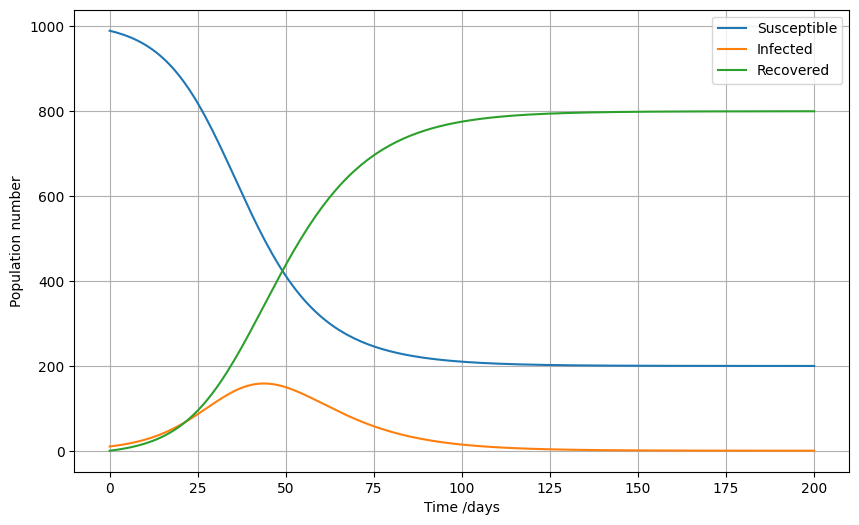

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2,  0.1
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Runge-Kutta 4 method
def rk4(deriv, y0, t, args):
    dt = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = dt * np.array(deriv(y[i-1], t[i-1], *args))
        k2 = dt * np.array(deriv(y[i-1] + k1/2, t[i-1] + dt/2, *args))
        k3 = dt * np.array(deriv(y[i-1] + k2/2, t[i-1] + dt/2, *args))
        k4 = dt * np.array(deriv(y[i-1] + k3, t[i-1] + dt, *args))
        y[i] = y[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = rk4(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Population number')

plt.legend()
plt.grid(True)
plt.show()


 **We can solve numerically using 4th order runge kutta method, assuming N=1000, I0(initial infected)= 10 , R0( intial recovered)=0, $\beta$=0.2 , and $\gamma$=1./10 , let the time grid be 200 days**

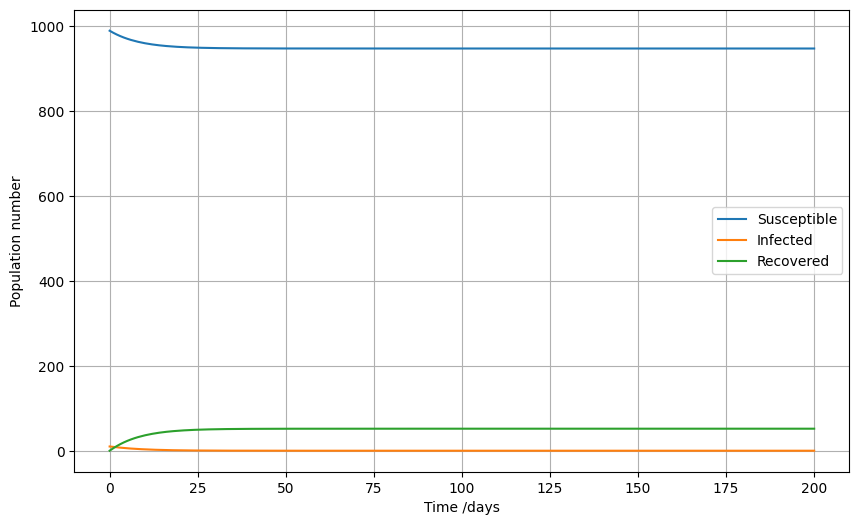

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5,  0.6
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Runge-Kutta 4 method
def rk4(deriv, y0, t, args):
    dt = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = dt * np.array(deriv(y[i-1], t[i-1], *args))
        k2 = dt * np.array(deriv(y[i-1] + k1/2, t[i-1] + dt/2, *args))
        k3 = dt * np.array(deriv(y[i-1] + k2/2, t[i-1] + dt/2, *args))
        k4 = dt * np.array(deriv(y[i-1] + k3, t[i-1] + dt, *args))
        y[i] = y[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = rk4(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Population number')

plt.legend()
plt.grid(True)
plt.show()


**or maybe using a scipy implimentation of 4th order runge kutta solve_ivp**

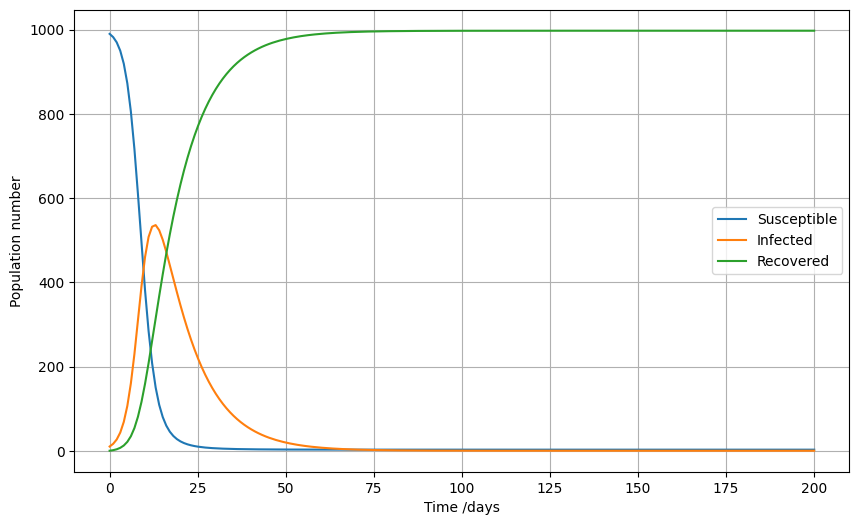

In [97]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.6, 0.1
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
sol = solve_ivp(deriv, [t[0], t[-1]], y0, args=(N, beta, gamma), dense_output=True, method='RK45')

# Get the solutions
S, I, R = sol.sol(t)

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time /days')
plt.ylabel('Population number')
plt.legend()
plt.grid(True)
plt.show()


**Different values for $\beta$**

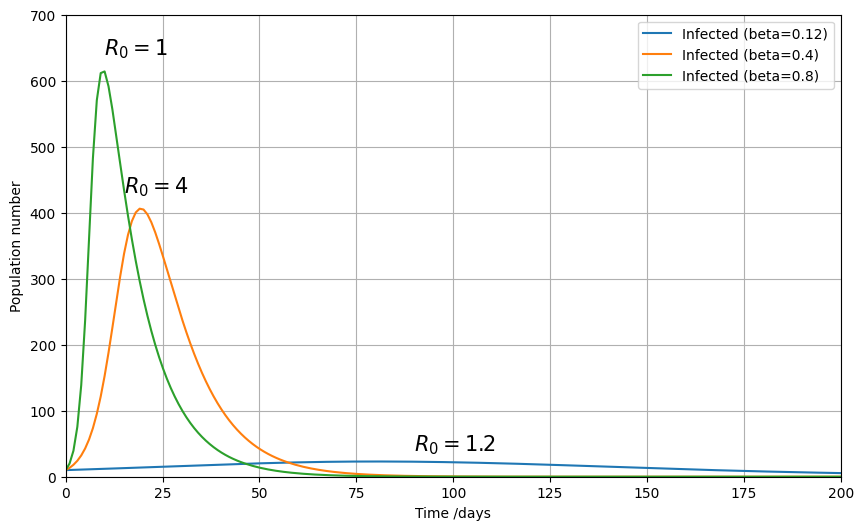

In [69]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Mean recovery rate, gamma, (in 1/days).
gamma = 0.1
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Contact rates, beta
betas = [0.12, 0.4, 0.8]

plt.figure(figsize=(10, 6))

for beta in betas:
    # Integrate the SIR equations over the time grid, t.
    sol = solve_ivp(deriv, [t[0], t[-1]], y0, args=(N, beta, gamma), dense_output=True, method='RK45')

    # Get the solutions
    S, I, R = sol.sol(t)

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #plt.plot(t, S, label=f'Susceptible (beta={beta})')
    plt.plot(t, I, label=f'Infected (beta={beta})')
    #plt.plot(t, R, label=f'Recovered (beta={beta})')

plt.xlabel('Time /days')
plt.ylabel('Population number')
plt.xlim(0,200)
plt.ylim(0,700)
plt.text(10, 640, '$R_0=1$', fontsize = 15)
plt.text(15, 430, '$R_0=4$', fontsize = 15)
plt.text(90, 40, '$R_0=1.2$', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()


## SIRV Model
Now lets consider an extended version of SIR model that accounts for vaccination of the susceptible population. the differential equations become:
$\begin{aligned} & \frac{d S}{d t}=-\frac{\beta(t) I S}{N}-v(t) S \\ & \frac{d I}{d t}=\frac{\beta(t) I S}{N}-\gamma(t) I \\ & \frac{d R}{d t}=\gamma(t) I \\ & \frac{d V}{d t}=v(t) S\end{aligned}$

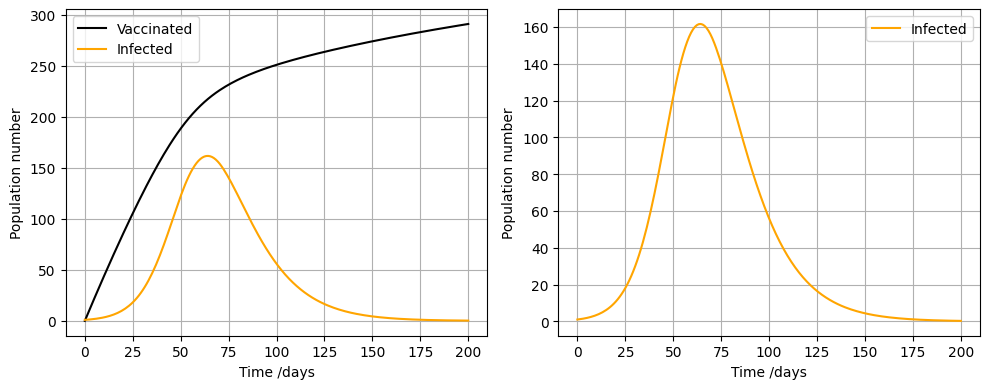

In [92]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, V0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - V0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./14
# Vaccination rate, nu, (in 1/days).
nu = 0.0045
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIRV model differential equations.
def deriv(t, y, N, beta, gamma, nu):
    S, I, R, V = y
    dSdt = -beta * S * I / N - nu * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return dSdt, dIdt, dRdt, dVdt

# Initial conditions vector
y0 = S0, I0, R0, V0
# Integrate the SIRV equations over the time grid, t.
sol = solve_ivp(deriv, [t[0], t[-1]], y0, args=(N, beta, gamma, nu), dense_output=True, method='RK45')

# Get the solutions
S, I, R, V = sol.sol(t)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the data on two separate curves for V(t) and I(t)
axs[0].plot(t, V, label='Vaccinated', color='black')
axs[0].plot(t, I, label='Infected', color='orange')
axs[0].set_xlabel('Time /days')
axs[0].set_ylabel('Population number')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, I, label='Infected', color='orange')
axs[1].set_xlabel('Time /days')
axs[1].set_ylabel('Population number')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


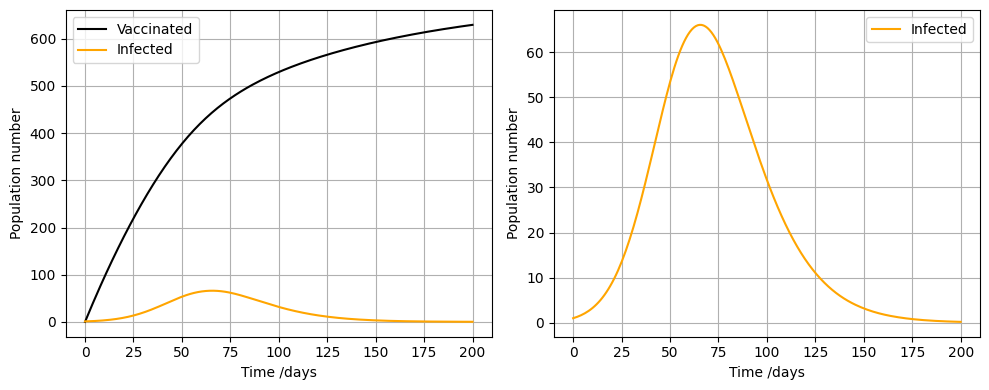

In [94]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, V0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - V0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./14
# Vaccination rate, nu, (in 1/days).
nu = 0.01
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIRV model differential equations.
def deriv(t, y, N, beta, gamma, nu):
    S, I, R, V = y
    dSdt = -beta * S * I / N - nu * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return dSdt, dIdt, dRdt, dVdt

# Initial conditions vector
y0 = S0, I0, R0, V0
# Integrate the SIRV equations over the time grid, t.
sol = solve_ivp(deriv, [t[0], t[-1]], y0, args=(N, beta, gamma, nu), dense_output=True, method='RK45')

# Get the solutions
S, I, R, V = sol.sol(t)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the data on two separate curves for V(t) and I(t)
axs[0].plot(t, V, label='Vaccinated', color='black')
axs[0].plot(t, I, label='Infected', color='orange')
axs[0].set_xlabel('Time /days')
axs[0].set_ylabel('Population number')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, I, label='Infected', color='orange')
axs[1].set_xlabel('Time /days')
axs[1].set_ylabel('Population number')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
